### Import libraries

In [1]:
import cv2 as cv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mediapipe as mp

### Keypoint by mediapipe holistic

In [2]:
#Holistic model
mp_holistic = mp.solutions.holistic 

#Drawing utilities
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  #converting color from BGR to RGB
  image.flags.writeable = False #cannot write on image
  result = model.process(image) #make prediction
  image.flags.writeable =True #now image is writeable
  image = cv.cvtColor(image, cv.COLOR_RGB2BGR) #converting color from RGb to BGR
  
  return image, result

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, result):
  #draw face connections
  mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,111), thickness=1, circle_radius=1)
                            )
  
  #draw pose connecctions
  mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            )

  #draw left hand connections
  mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
  
  #draw right hand connections
  mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )

In [6]:
cap = cv.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

      #read feed
      ret, frame = cap.read()
      # frame = cv.flip(frame, 1)

      #make detections
      image, result = mediapipe_detection(frame, holistic)
      print(result)

      #draw landmarks
      draw_styled_landmarks(image, result)
      # draw_landmarks(image, result)

      #display 
      cv.imshow('Sign Recognition', image)

      #break gracefully
      if cv.waitKey(1) & 0xFF == ord('q'):
        break

  cap.release()
  cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
result

mediapipe.python.solution_base.SolutionOutputs

In [8]:
result.face_landmarks

landmark {
  x: 0.5216516852378845
  y: 0.5794834494590759
  z: -0.024462414905428886
}
landmark {
  x: 0.5178605318069458
  y: 0.5406925678253174
  z: -0.04635844752192497
}
landmark {
  x: 0.5200397372245789
  y: 0.5531805157661438
  z: -0.024485034868121147
}
landmark {
  x: 0.5100013017654419
  y: 0.5009488463401794
  z: -0.033943191170692444
}
landmark {
  x: 0.5172016620635986
  y: 0.5281311273574829
  z: -0.04928651824593544
}
landmark {
  x: 0.5170191526412964
  y: 0.5117549896240234
  z: -0.04575789347290993
}
landmark {
  x: 0.5175479054450989
  y: 0.4728139638900757
  z: -0.022351445630192757
}
landmark {
  x: 0.4588524103164673
  y: 0.4775637686252594
  z: 0.016851253807544708
}
landmark {
  x: 0.5171907544136047
  y: 0.44503843784332275
  z: -0.016485994681715965
}
landmark {
  x: 0.5166933536529541
  y: 0.42877423763275146
  z: -0.01803804747760296
}
landmark {
  x: 0.5160338282585144
  y: 0.36918050050735474
  z: -0.008326243609189987
}
landmark {
  x: 0.5219866037368774

In [9]:
len(result.face_landmarks.landmark)

468

In [10]:
frame

array([[[ 39,  70,  73],
        [ 43,  73,  78],
        [ 39,  67,  79],
        ...,
        [121, 127, 122],
        [108, 128, 118],
        [101, 134, 120]],

       [[ 46,  75,  82],
        [ 44,  73,  82],
        [ 44,  70,  86],
        ...,
        [125, 133, 126],
        [112, 133, 121],
        [102, 134, 119]],

       [[ 57,  83,  97],
        [ 44,  69,  86],
        [ 42,  65,  87],
        ...,
        [127, 135, 125],
        [117, 136, 123],
        [108, 136, 120]],

       ...,

       [[149, 160, 158],
        [158, 169, 167],
        [175, 186, 183],
        ...,
        [159, 181, 162],
        [157, 180, 160],
        [159, 182, 161]],

       [[161, 173, 171],
        [167, 179, 177],
        [176, 188, 186],
        ...,
        [162, 184, 162],
        [159, 181, 159],
        [160, 182, 160]],

       [[167, 180, 178],
        [171, 184, 182],
        [177, 190, 188],
        ...,
        [162, 185, 160],
        [161, 183, 159],
        [162, 184, 160]]

In [11]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [12]:
draw_landmarks(frame, result)

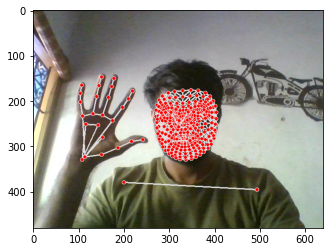

In [13]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

In [14]:
result.right_hand_landmarks.landmark

[x: 0.1791444718837738
y: 0.6731598377227783
z: 4.769900669998606e-07
, x: 0.23706991970539093
y: 0.6632466316223145
z: -0.02663649059832096
, x: 0.2927479147911072
y: 0.633049488067627
z: -0.039843592792749405
, x: 0.34006035327911377
y: 0.6032247543334961
z: -0.05149198696017265
, x: 0.37943536043167114
y: 0.5948969125747681
z: -0.06273433566093445
, x: 0.2735576033592224
y: 0.5081619024276733
z: -0.01565754972398281
, x: 0.30890747904777527
y: 0.4474594295024872
z: -0.029757892712950706
, x: 0.3283262252807617
y: 0.40673503279685974
z: -0.04343302920460701
, x: 0.343291312456131
y: 0.3724004030227661
z: -0.05382012948393822
, x: 0.24029117822647095
y: 0.48241594433784485
z: -0.015072746202349663
, x: 0.25966107845306396
y: 0.4002094268798828
z: -0.026328954845666885
, x: 0.27077949047088623
y: 0.3516572117805481
z: -0.038052719086408615
, x: 0.27925968170166016
y: 0.31353241205215454
z: -0.0468270517885685
, x: 0.2064974457025528
y: 0.4758514165878296
z: -0.018152086064219475
, x: 0

In [15]:
len(result.pose_landmarks.landmark)

33

### Extract Keypoint values

In [16]:
pose = []
for res in result.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.50209016,  0.5362162 , -0.72793937,  0.99997729]),
 array([ 0.53462076,  0.46808439, -0.7048288 ,  0.9999404 ]),
 array([ 0.55338776,  0.46873051, -0.70452648,  0.99993336]),
 array([ 0.57005256,  0.47090134, -0.70475036,  0.99994409]),
 array([ 0.47531423,  0.46950758, -0.66547573,  0.99993992]),
 array([ 0.45650816,  0.47051308, -0.664621  ,  0.99992454]),
 array([ 0.44237819,  0.47253874, -0.6647082 ,  0.99994296]),
 array([ 0.59481621,  0.49731189, -0.39876524,  0.99995291]),
 array([ 0.42921919,  0.50102794, -0.18313964,  0.999937  ]),
 array([ 0.54095918,  0.5987705 , -0.62700021,  0.99997014]),
 array([ 0.46749067,  0.60124779, -0.56692117,  0.99996603]),
 array([ 0.77330136,  0.82464111, -0.28396308,  0.99955362]),
 array([ 0.3126938 ,  0.78979582, -0.05148581,  0.99948364]),
 array([ 0.9214431 ,  1.22774208, -0.36220679,  0.82549518]),
 array([ 0.07728913,  1.07195807, -0.52642071,  0.95286709]),
 array([ 0.93459332,  1.58538008, -0.52296275,  0.83279675]),
 array([

In [18]:
def extract_keypoints(result):
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4) 
    lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3) 

    return np.concatenate([face, pose, lh, rh])

In [19]:
result_test = extract_keypoints(result)

In [20]:
result_test

array([ 0.52165169,  0.57948345, -0.02446241, ...,  0.16850531,
        0.34547836, -0.04422193])

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

### Setup folder for collection

In [21]:
# Path for extracted data in numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'i love you', 'thanks'])

# Thirty video data
no_sequences = 30

# Video in 30 frames in length
sequence_len = 30

# Folder start
start_folder = 30

In [23]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collect keypoint values for training & testing

In [ ]:
cap = cv.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  # loop through actions  
  for action in actions:
    #loop through sequence as videos
    for  sequence in range(no_sequences):
        #loop through video length as sequence length
        for frame_no in range(sequence_len):

            #read feed
            ret, frame = cap.read()
            # frame = cv.flip(frame, 1)

            #make detections
            image, result = mediapipe_detection(frame, holistic)
            print(result)

            #draw landmarks
            draw_styled_landmarks(image, result)

            #applying collection logic
            if frame_no = 0:
                cv.putText(image, 'Starting Collection', (120,200), cv.FONT_HERSHEY_SIMPLEX,
                1, (0,255,0), 4, cv.LINE_AA)
                cv.putText(image, 'Collecting frames for {} Video {}'.format(action, sequence), (15,12), 
                cv.FONT_HERSHEY_SIMPLEX, 10.5(0,0,255), 4, cv.LINE_AA)
                cv.waitKey(2000)
            else:
                cv.putText(image, 'Collecting frames for {} Video {}'.format(action, sequence), (15,12), 
                cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 4, cv.LINE_AA)    


            #display 
            cv.imshow('Sign Recognition', image)

    #break gracefully
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
 
  cap.release()
  cv.destroyAllWindows()